# CANADA AUTO MPG PROJECT

For final project I have chosen dataset about cars which describes car specifications and amount of CO2 emissions to air from Canada Government web portal. According to Paris Agreement on Climate change which is signed Paris climate conference (COP21) in December 2015, governments had to work together to decrease world's temperature by 1.5 C degrees. With this analysis, I would like to find out how car manufacturers from different regions have had good progress. 

Questions to be answered:

1) Which region has most impact on CO2 emission?

2) Did CO2 emission decrease during recorded 14 years?

3) Which manufacturers polute the most?

4) How number of cylinders, mile per gallon, engine size affect the emission?

5) How crisis affect to manufacturers on decreasing emission?

In [1]:
#importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

#reading the dataset 
url = "https://www.nrcan.gc.ca/sites/www.rncan.gc.ca/files/oee/files/csv/Original%20MY2000-2014%20Fuel%20Consumption%20Ratings%20(2-cycle).csv" 
df = pd.read_csv(url, encoding = 'unicode_escape', header = 1, dtype = None, low_memory = False)  

In [2]:
df.head() #to see first 5 rows of our dataframe 

,YEAR,Unnamed: 1,# = high output engine,Unnamed: 3,(L),Unnamed: 5,Unnamed: 6,TYPE,CITY (L/100 km),HWY (L/100 km),...,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220
0,2000,ACURA,1.6EL,COMPACT,1.6,4.0,A4,X,9.2,6.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,ACURA,1.6EL,COMPACT,1.6,4.0,M5,X,8.5,6.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6.0,AS5,Z,12.2,7.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6.0,A4,Z,13.4,9.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,10.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info() #to get information about our dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14364 entries, 0 to 14363
Columns: 221 entries, YEAR to Unnamed: 220
dtypes: float64(215), object(6)
memory usage: 24.2+ MB


As it is seen above our dataframe is not clean and it has meaningless columns and rows which need to be dropped. If we look at the dataset we can see only 14 columns and 14343 rows are described. So lets drop rest of them.

In [4]:
df.drop(df.iloc[: , 13:], inplace = True, axis = 1) #drops columns from column index 13 to the right
df.drop(df.index[14343:],inplace=True) #drops rows from row index 14343 to the bottom 

Now if we look at the information we can see the difference.

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14343 entries, 0 to 14342
Data columns (total 13 columns):
YEAR                      14343 non-null object
Unnamed: 1                14343 non-null object
# = high output engine    14343 non-null object
Unnamed: 3                14343 non-null object
(L)                       14343 non-null float64
Unnamed: 5                14343 non-null float64
Unnamed: 6                14343 non-null object
TYPE                      14343 non-null object
CITY (L/100 km)           14343 non-null float64
HWY (L/100 km)            14343 non-null float64
COMB (L/100 km)           14343 non-null float64
COMB (mpg)                14343 non-null float64
(g/km)                    14343 non-null float64
dtypes: float64(7), object(6)
memory usage: 1.5+ MB


In [6]:
df.shape #shows the dimensions of the data frame 

(14343, 13)

In [7]:
df.head()

,YEAR,Unnamed: 1,# = high output engine,Unnamed: 3,(L),Unnamed: 5,Unnamed: 6,TYPE,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),(g/km)
0,2000,ACURA,1.6EL,COMPACT,1.6,4.0,A4,X,9.2,6.7,8.1,35.0,186.0
1,2000,ACURA,1.6EL,COMPACT,1.6,4.0,M5,X,8.5,6.5,7.6,37.0,175.0
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6.0,AS5,Z,12.2,7.4,10.0,28.0,230.0
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6.0,A4,Z,13.4,9.2,11.5,25.0,264.0
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,10.0,7.0,8.6,33.0,198.0


In [8]:
df.tail() #checks the last 5 rows of the dataframe

,YEAR,Unnamed: 1,# = high output engine,Unnamed: 3,(L),Unnamed: 5,Unnamed: 6,TYPE,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),(g/km)
14338,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6.0,AS6,X,11.9,8.3,10.3,27.0,237.0
14339,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6.0,AS6,X,11.7,8.0,10.0,28.0,230.0
14340,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6.0,AS6,X,11.9,8.3,10.3,27.0,237.0
14341,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6.0,AS6,X,11.4,7.8,9.8,29.0,225.0
14342,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6.0,AS6,X,13.3,8.6,11.2,25.0,258.0


In [9]:
df.isnull().any() #checks if there is any null value in our dataframe

YEAR                      False
Unnamed: 1                False
# = high output engine    False
Unnamed: 3                False
(L)                       False
Unnamed: 5                False
Unnamed: 6                False
TYPE                      False
CITY (L/100 km)           False
HWY (L/100 km)            False
COMB (L/100 km)           False
COMB (mpg)                False
(g/km)                    False
dtype: bool

However, there is still problem with the data frame as the name of the columns do not make sense. Therefore, I defined the following names in a list and assigned it to columns. 

In [10]:
#changing the column names
df.columns = ['Year', 'Make','Model','Class','Engine Size','Cylinders','Transmission','Fuel Type','FC CITY','FC HWY', 'FC Comb','MPG', 'CO2'] 

In [11]:
df.head() 

,Year,Make,Model,Class,Engine Size,Cylinders,Transmission,Fuel Type,FC CITY,FC HWY,FC Comb,MPG,CO2
0,2000,ACURA,1.6EL,COMPACT,1.6,4.0,A4,X,9.2,6.7,8.1,35.0,186.0
1,2000,ACURA,1.6EL,COMPACT,1.6,4.0,M5,X,8.5,6.5,7.6,37.0,175.0
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6.0,AS5,Z,12.2,7.4,10.0,28.0,230.0
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6.0,A4,Z,13.4,9.2,11.5,25.0,264.0
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,10.0,7.0,8.6,33.0,198.0


In the analysis, as I would need origin of the the cars, I had to create new column (called Origin). 

In [12]:
#following lambda function creates column named 'Origin' with three values; 'ASIA', 'EUROPE', 'US' 
df['Origin'] = df['Make'].apply(lambda x: 'ASIA' if x in ['ACURA', 'HONDA', 'DAEWOO', 'HYUNDAI', 'INFINITI', 'ISUZU', 'KIA', 'LEXUS', 'MAZDA', 'MITSUBISHI', 'NISSAN', 'SCION', 'SUBARU', 'SUZUKI', 'TOYOTA'] else( 'EUROPE' if x in ['ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'BUGATTI', 'FERRARI', 'FIAT', 'JAGUAR', 'LAMBORGHINI', 'LAND ROVER', 'MASERATI', 'MERCEDES-BENZ', 'MINI', 'PORSCHE', 'ROLLS-ROYCE', 'SAAB', 'SMART', 'VOLKSWAGEN', 'VOLVO'] else 'US')) # In[11]: 

In [13]:
df.head()

,Year,Make,Model,Class,Engine Size,Cylinders,Transmission,Fuel Type,FC CITY,FC HWY,FC Comb,MPG,CO2,Origin
0,2000,ACURA,1.6EL,COMPACT,1.6,4.0,A4,X,9.2,6.7,8.1,35.0,186.0,ASIA
1,2000,ACURA,1.6EL,COMPACT,1.6,4.0,M5,X,8.5,6.5,7.6,37.0,175.0,ASIA
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6.0,AS5,Z,12.2,7.4,10.0,28.0,230.0,ASIA
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6.0,A4,Z,13.4,9.2,11.5,25.0,264.0,ASIA
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,10.0,7.0,8.6,33.0,198.0,ASIA


In [14]:
df.dtypes #checks datatypes 

Year             object
Make             object
Model            object
Class            object
Engine Size     float64
Cylinders       float64
Transmission     object
Fuel Type        object
FC CITY         float64
FC HWY          float64
FC Comb         float64
MPG             float64
CO2             float64
Origin           object
dtype: object

As we can see Year column is object (string in Python) data type. For the analysis I had to change the Year column to integer for better visualizations. 

In [15]:
df['Year']=df['Year'].astype(int) #changes data type to integer

Now we have clean data frame to do our analysis. First, I did descriptive stats.

In [16]:
df.describe() #finds descriptive stats for all numeric columns

,Year,Engine Size,Cylinders,FC CITY,FC HWY,FC Comb,MPG,CO2
count,14343.000000,14343.000000,14343.000000,14343.000000,14343.000000,14343.000000,14343.000000,14343.000000
mean,2007.623022,3.474308,5.989054,12.914279,8.815708,11.071512,27.353483,248.530782
std,4.140223,1.310875,1.776277,3.549669,2.344114,2.976739,7.503766,59.144102
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2004.000000,2.400000,4.000000,10.600000,7.200000,9.100000,22.000000,209.000000
50%,2008.000000,3.400000,6.000000,12.400000,8.300000,10.500000,27.000000,239.000000
75%,2011.000000,4.300000,8.000000,14.900000,10.200000,12.800000,31.000000,285.000000
max,2014.000000,8.400000,16.000000,30.600000,19.000000,24.800000,78.000000,570.000000


In [17]:
df['CO2'].describe() #to have a closer look to CO2

count    14343.000000
mean       248.530782
std         59.144102
min         83.000000
25%        209.000000
50%        239.000000
75%        285.000000
max        570.000000
Name: CO2, dtype: float64

As we can see above, CO2 has the most standard deviation among our numeric columns. To see distribution of CO2 better, I plotted it as follows: 

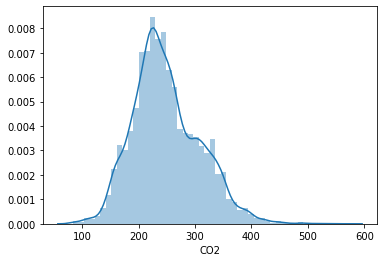

In [18]:
sns.distplot(df['CO2']) #distribution plot of CO2

In [19]:
print("Skewness: %f" % df['CO2'].skew()) 
print("Kurtosis: %f" % df['CO2'].kurt())

Skewness: 0.497452
Kurtosis: 0.278521


To see the relationship between variables I created pairplots.

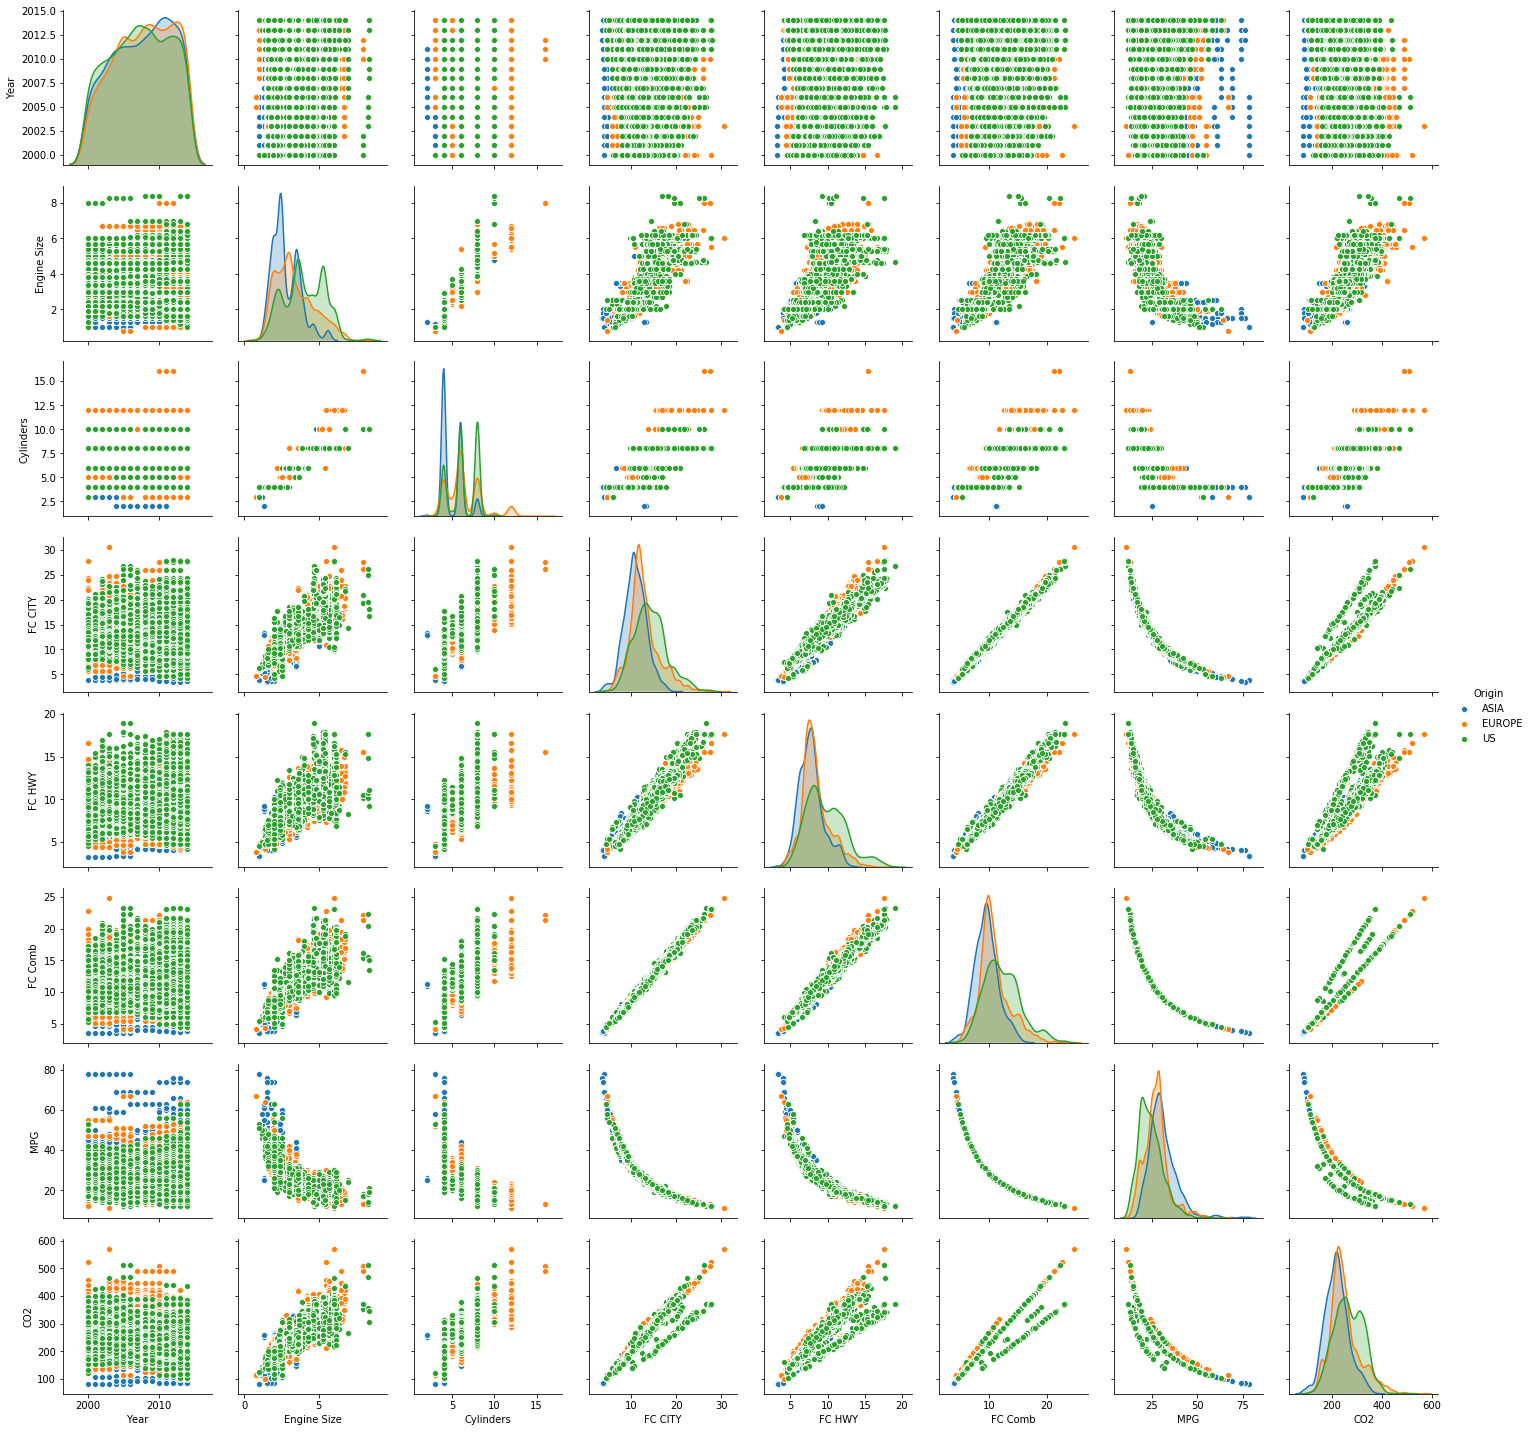

In [20]:
sns.pairplot(data=df, hue = 'Origin')
plt.show()

Sometimes to compare different variables are impossible. The reason why is that the might have different measures or scale. For better data visualization I defined the function to have 0-1 scale for following columns:

In [21]:
#scale function
def scale(a): 
    b = (a-a.min())/(a.max()-a.min()) 
    return b 

In [22]:
#duplicating the data
df_scale = df.copy() 

In [23]:
df_scale ['Engine Size'] = scale(df_scale['Engine Size'])
df_scale['Cylinders'] = scale(df_scale['Cylinders']) 
df_scale ['FC CITY'] = scale(df_scale['FC CITY']) 
df_scale ['FC HWY'] = scale(df_scale['FC HWY']) 
df_scale['FC Comb'] = scale(df_scale['FC Comb']) 
df_scale['MPG'] = scale(df_scale['MPG']) 
df_scale['CO2'] = scale(df_scale['CO2']) 

In [24]:
df_scale.head() 

,Year,Make,Model,Class,Engine Size,Cylinders,Transmission,Fuel Type,FC CITY,FC HWY,FC Comb,MPG,CO2,Origin
0,2000,ACURA,1.6EL,COMPACT,0.105263,0.142857,A4,X,0.210332,0.221519,0.212264,0.358209,0.211499,ASIA
1,2000,ACURA,1.6EL,COMPACT,0.105263,0.142857,M5,X,0.184502,0.208861,0.188679,0.388060,0.188912,ASIA
2,2000,ACURA,3.2TL,MID-SIZE,0.315789,0.285714,AS5,Z,0.321033,0.265823,0.301887,0.253731,0.301848,ASIA
3,2000,ACURA,3.5RL,MID-SIZE,0.355263,0.285714,A4,Z,0.365314,0.379747,0.372642,0.208955,0.371663,ASIA
4,2000,ACURA,INTEGRA,SUBCOMPACT,0.131579,0.142857,A4,X,0.239852,0.240506,0.235849,0.328358,0.236140,ASIA


Correlation heatmap is created to see how strong the realtionships are between variables.

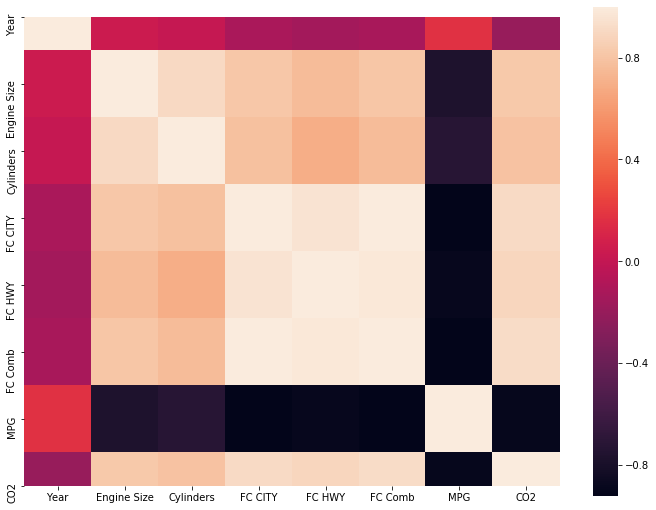

In [25]:
corrmat = df.corr() 
f, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(corrmat, square=True)

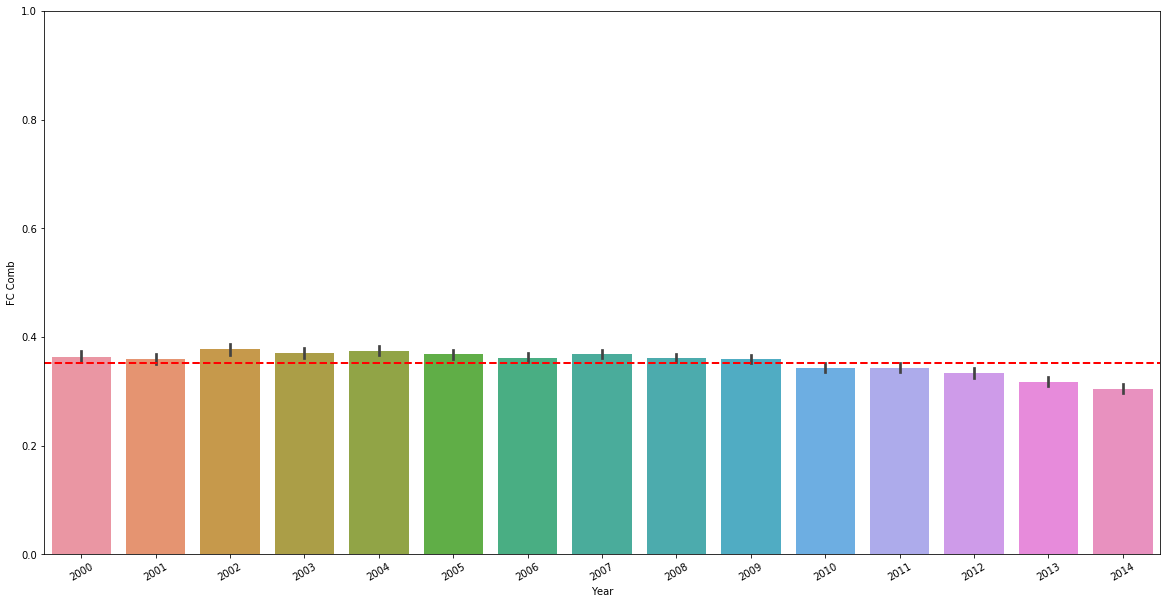

In [26]:
#box plot: fuel consumption during the years
var = 'Year' 
data_plt = pd.concat([df_scale['FC Comb'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20,10)) 
fig = sns.barplot(x=var, y="FC Comb", data=data_plt)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30) 
fig.axis(ymin=0, ymax=1) 
plt.axhline(df_scale['FC Comb'].mean(),color='r',linestyle='dashed',linewidth=2) 

How does number of cylinders affect the CO2?

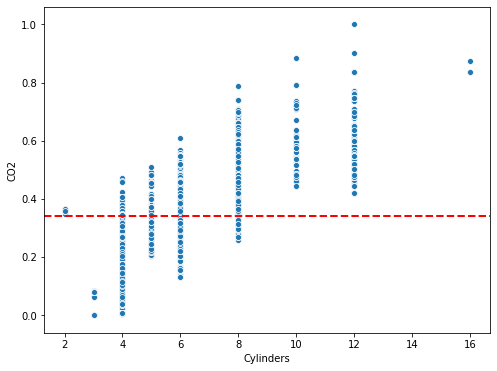

In [27]:
#scatter plot: CO2 vs Cylinders
var = 'Cylinders'
data_plt = pd.concat([df_scale['CO2'], df[var]], axis=1) 
f, ax = plt.subplots(figsize=(8, 6)) 
fig = sns.scatterplot(x=var, y="CO2", data=data_plt) 
plt.axhline(df_scale.CO2.mean(),color='r',linestyle='dashed',linewidth=2)

How does engine size affects the CO2?

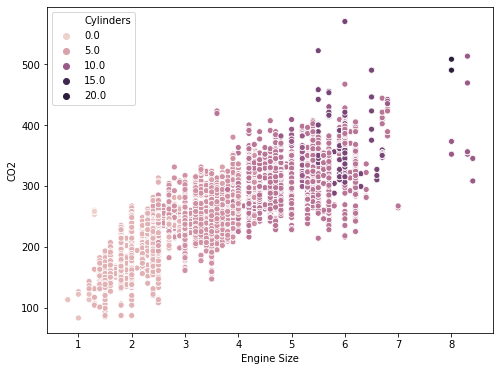

In [28]:
#Scatter plot: CO2 vs Engine Size 
var = 'Engine Size' 
data_plt = pd.concat([df['CO2'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.scatterplot(x=var, y="CO2", data=data_plt, hue = df['Cylinders'])

How does MPG affects CO2?

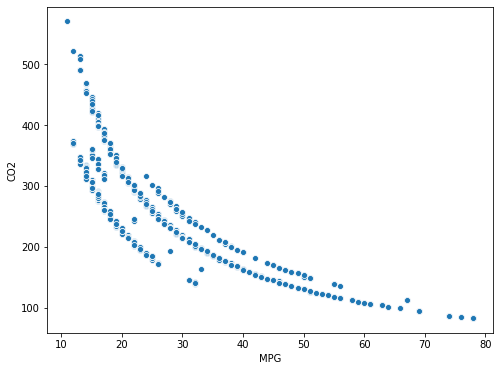

In [29]:
#Scatter plot: CO2 vs MPG
var = 'MPG' 
data_plt = pd.concat([df['CO2'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6)) 
fig = sns.scatterplot(x=var, y="CO2", data=data_plt)

Which region has most impact on CO2 emission?

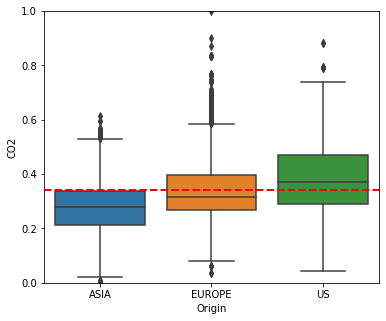

In [30]:
#Box plot of CO2 in different regions.
data_plt = pd.concat([df_scale['CO2'], df_scale['Origin']], axis=1) 
f, ax = plt.subplots(figsize=(6, 5)) 
fig = sns.boxplot(x='Origin', y="CO2", data=data_plt) 
fig.axis(ymin=0, ymax=1) 
plt.axhline(df_scale.CO2.mean(),color='r',linestyle='dashed',linewidth=2) 
display(fig)

Did CO2 level decreased during these years?

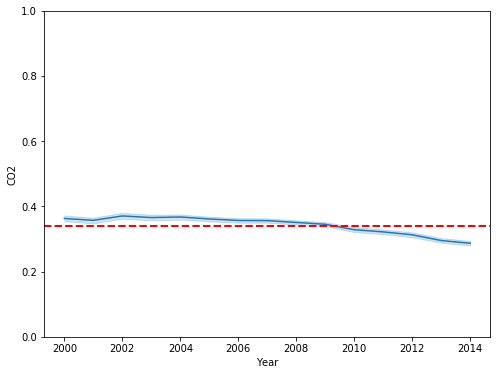

In [31]:
#line graph of CO2 during 14 years
var = 'Year' 
data_plt = pd.concat([df_scale['CO2'], df_scale[var]], axis=1) 
f, ax = plt.subplots(figsize=(8, 6)) 
fig = sns.lineplot(x=var, y="CO2", data=data_plt) 
fig.axis(ymin=0, ymax=1)
plt.axhline(df_scale.CO2.mean(),color='r',linestyle='dashed',linewidth=2)

Same analysis with distibution plots:

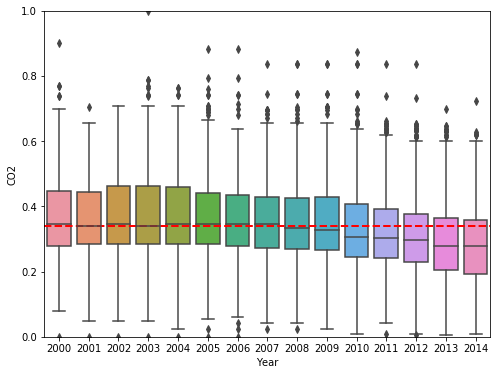

In [32]:
#box plot of CO2 during 14 years
var = 'Year' 
data_plt = pd.concat([df_scale['CO2'], df_scale[var]], axis=1) 
f, ax = plt.subplots(figsize=(8, 6)) 
fig = sns.boxplot(x=var, y="CO2", data=data_plt) 
fig.axis(ymin=0, ymax=1)
plt.axhline(df_scale.CO2.mean(),color='r',linestyle='dashed',linewidth=2)

Whihc manufacturers polute the most?

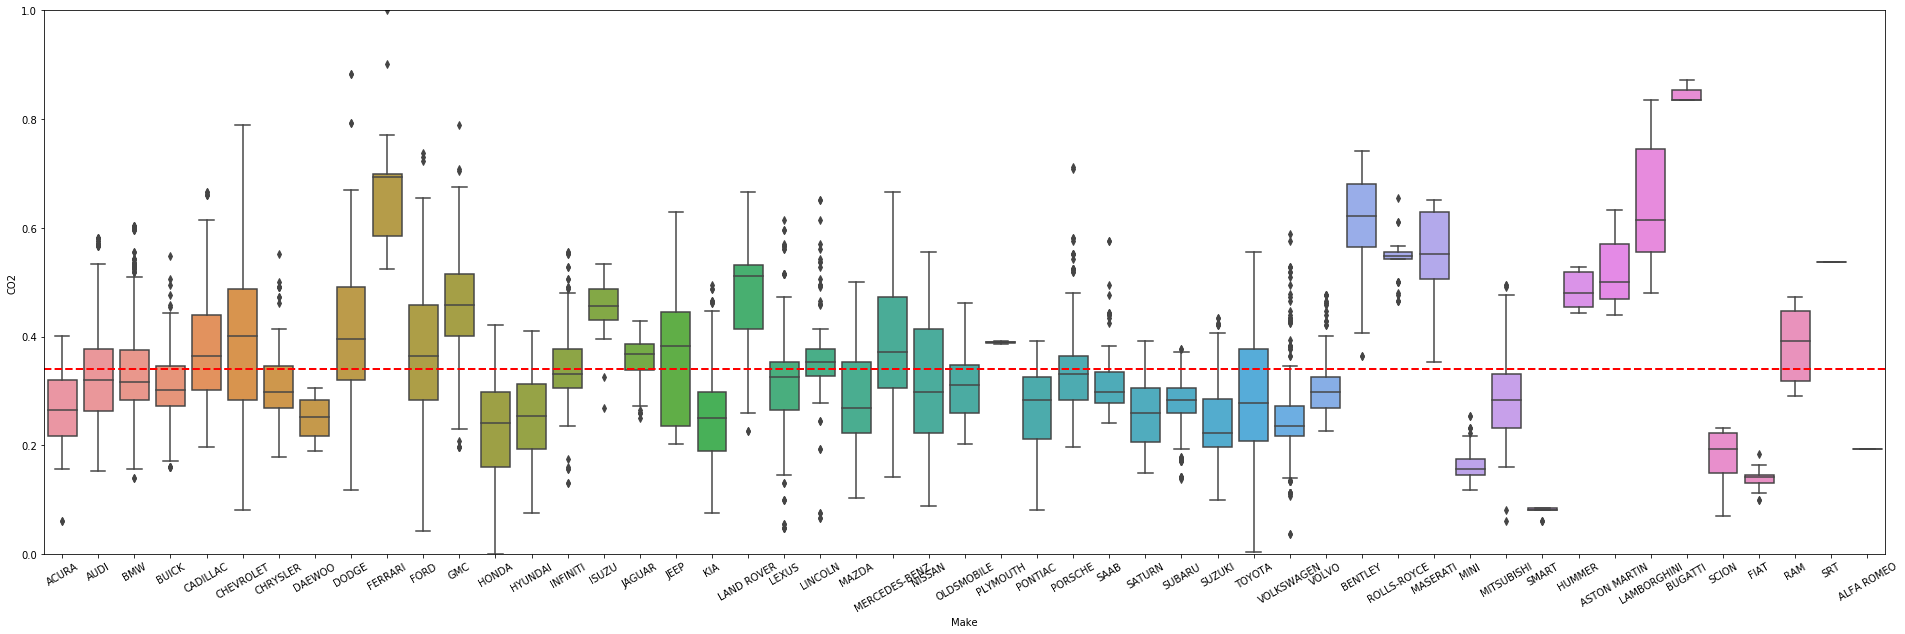

In [33]:
#Box plots of CO2 for different manufacturers 
var = 'Make' 
data_plt = pd.concat([df_scale['CO2'], df[var]], axis=1) 
f, ax = plt.subplots(figsize=(33,10)) 
fig = sns.boxplot(x=var, y="CO2", data=data_plt)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30) 
fig.axis(ymin=0, ymax=1)
plt.axhline(df_scale.CO2.mean(),color='r',linestyle='dashed',linewidth=2)

How much did manufacturers improve on decreasing CO2 emission before and after the crisis in different regions?

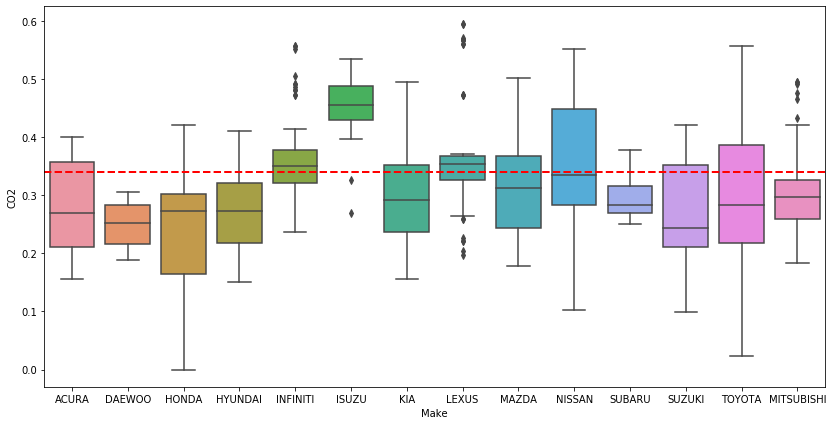

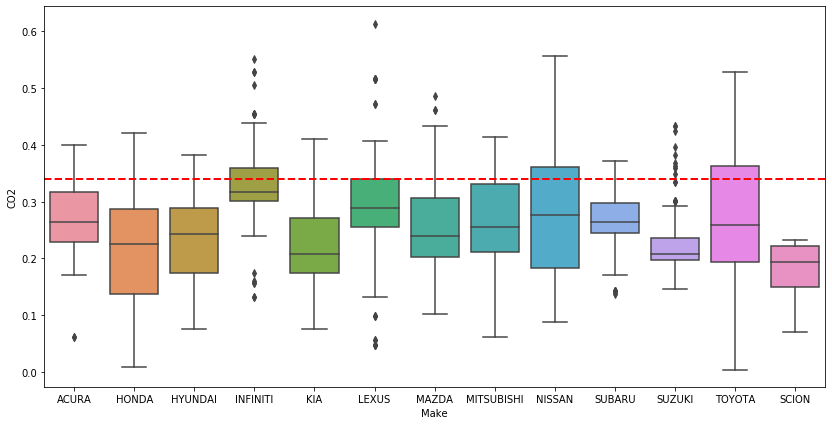

In [34]:
#ASIA before crisis
rslt_df = df_scale.loc[(df_scale['Origin'] == 'ASIA') & (df_scale['Year'] <= 2007)] 
var = 'Make' 
data_plt = pd.concat([rslt_df['CO2'], rslt_df[var]], axis=1) 
f, ax = plt.subplots(figsize=(14, 7)) 
fig = sns.boxplot(x=var, y="CO2", data=data_plt) 
plt.axhline(df_scale.CO2.mean(),color='r',linestyle='dashed',linewidth=2) 

#ASIA after crisis
rslt_df = df_scale.loc[(df_scale['Origin'] == 'ASIA') & (df_scale['Year'] > 2007)] 
var = 'Make' 
data_plt = pd.concat([rslt_df['CO2'], rslt_df[var]], axis=1) 
f, ax = plt.subplots(figsize=(14, 7)) 
fig = sns.boxplot(x=var, y="CO2", data=data_plt)
plt.axhline(df_scale.CO2.mean(),color='r',linestyle='dashed',linewidth=2) 



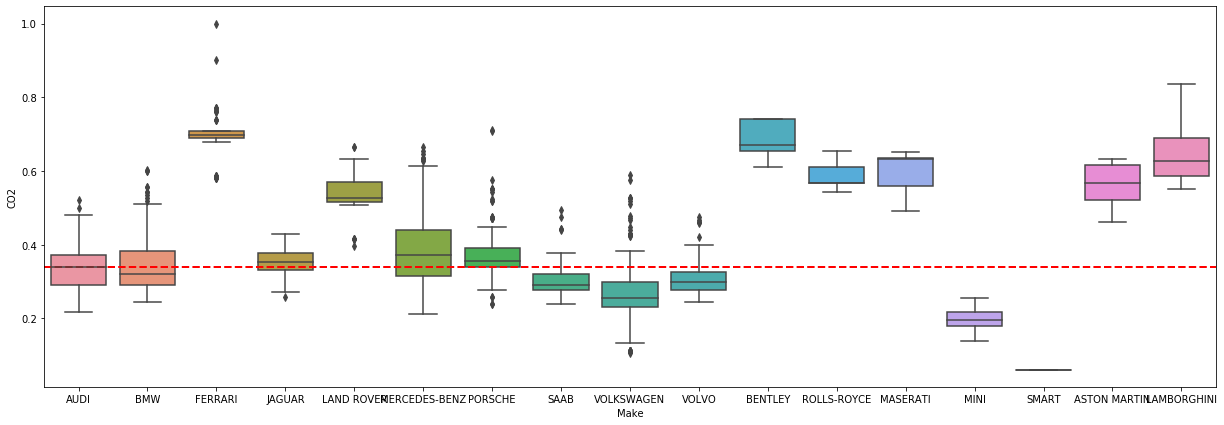

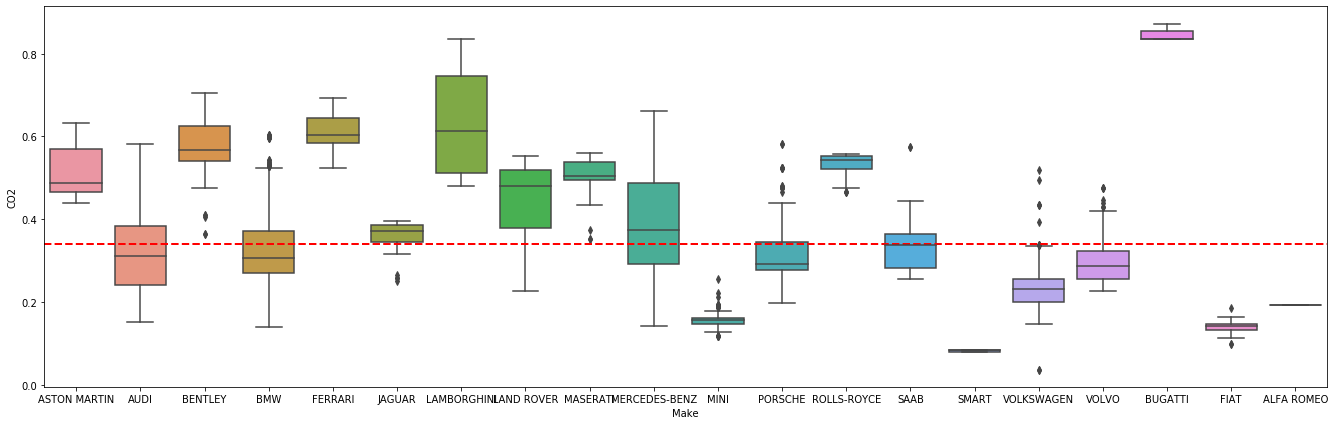

In [35]:
#EUROPE before crisis
rslt_df = df_scale.loc[(df_scale['Origin'] == 'EUROPE') & (df_scale['Year'] <= 2007)] 
var = 'Make' 
data_plt = pd.concat([rslt_df['CO2'], rslt_df[var]], axis=1) 
f, ax = plt.subplots(figsize=(21, 7)) 
fig = sns.boxplot(x=var, y="CO2", data=data_plt) 
plt.axhline(df_scale.CO2.mean(),color='r',linestyle='dashed',linewidth=2)

#EUROPE after crisis
rslt_df = df_scale.loc[(df_scale['Origin'] == 'EUROPE') & (df_scale['Year'] > 2007)] 
var = 'Make' 
data_plt = pd.concat([rslt_df['CO2'], rslt_df[var]], axis=1) 
f, ax = plt.subplots(figsize=(23, 7)) 
fig = sns.boxplot(x=var, y="CO2", data=data_plt) 
plt.axhline(df_scale.CO2.mean(),color='r',linestyle='dashed',linewidth=2) 


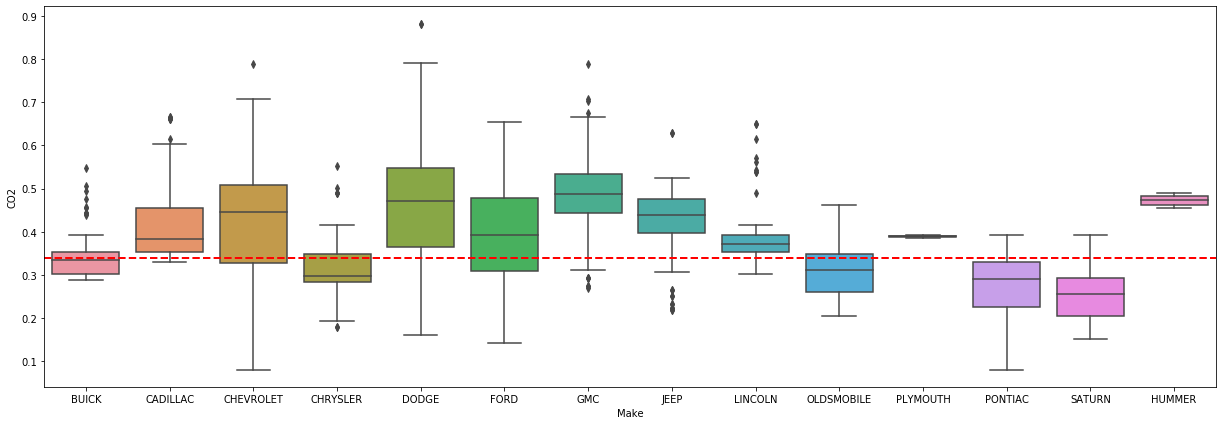

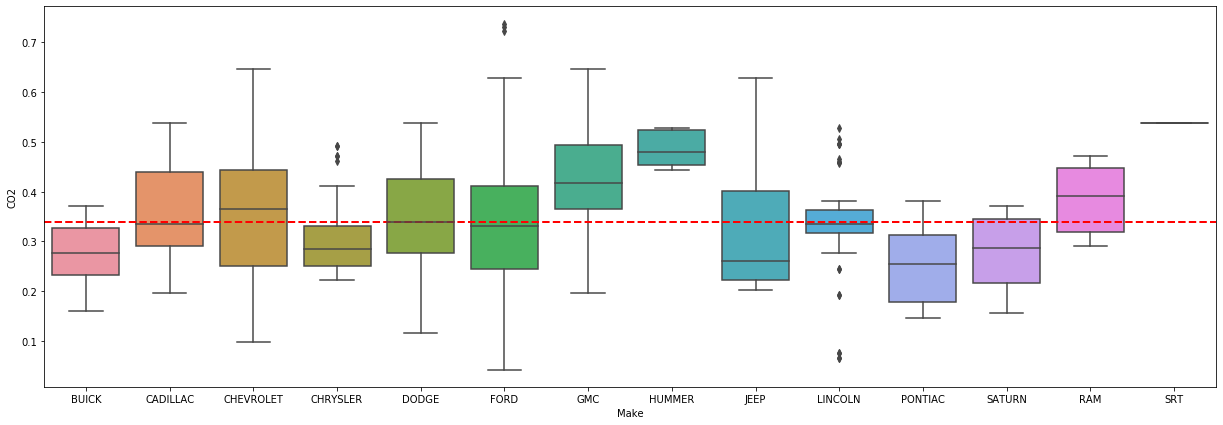

In [36]:
#US before crisis
rslt_df = df_scale.loc[(df_scale['Origin'] == 'US') & (df_scale['Year'] <= 2007)] 
var = 'Make' 
data_plt = pd.concat([rslt_df['CO2'], rslt_df[var]], axis=1) 
f, ax = plt.subplots(figsize=(21, 7)) 
fig = sns.boxplot(x=var, y="CO2", data=data_plt) 
plt.axhline(df_scale.CO2.mean(),color='r',linestyle='dashed',linewidth=2)

#US after crisis
rslt_df = df_scale.loc[(df_scale['Origin'] == 'US') & (df_scale['Year'] > 2007)] 
var = 'Make' 
data_plt = pd.concat([rslt_df['CO2'], rslt_df[var]], axis=1) 
f, ax = plt.subplots(figsize=(21, 7)) 
fig = sns.boxplot(x=var, y="CO2", data=data_plt) 
plt.axhline(df_scale.CO2.mean(),color='r',linestyle='dashed',linewidth=2) 

# CONCLUSION
From the analysis above I can conclude that:
1) Cars made in Asia polute less than any other region while US made carspolute the most. 2) When we checked the trend in 14 years CO2 emission has decreased slightly. 3) Luxery model cars like Bentley, Ferrari, Aston Martin has more effect on polution as they are high power cars. 4) Number of cylinders and engine size have a positive effect on CO2 emission. 5) Accoring to dataset, economic crisis did not have a big impact on production of low CO2 emission cars.